In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from time import time
import datetime
import warnings


warnings.filterwarnings('ignore')

In [2]:
tickerSymbol = "TSLA"
df = yf.Ticker(tickerSymbol)
df

yfinance.Ticker object <TSLA>

In [3]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=730)
tomorrow = end_date + datetime.timedelta(days=1)
prices = df.history(start=start_date, end=end_date).Close
prices

Date
2022-03-30 00:00:00-04:00    364.663330
2022-03-31 00:00:00-04:00    359.200012
2022-04-01 00:00:00-04:00    361.529999
2022-04-04 00:00:00-04:00    381.816681
2022-04-05 00:00:00-04:00    363.753326
                                ...    
2024-03-22 00:00:00-04:00    170.830002
2024-03-25 00:00:00-04:00    172.630005
2024-03-26 00:00:00-04:00    177.669998
2024-03-27 00:00:00-04:00    179.830002
2024-03-28 00:00:00-04:00    176.059998
Name: Close, Length: 502, dtype: float64

In [4]:
returns = prices.pct_change().dropna()
returns

Date
2022-03-31 00:00:00-04:00   -0.014982
2022-04-01 00:00:00-04:00    0.006487
2022-04-04 00:00:00-04:00    0.056113
2022-04-05 00:00:00-04:00   -0.047309
2022-04-06 00:00:00-04:00   -0.041695
                               ...   
2024-03-22 00:00:00-04:00   -0.011515
2024-03-25 00:00:00-04:00    0.010537
2024-03-26 00:00:00-04:00    0.029195
2024-03-27 00:00:00-04:00    0.012157
2024-03-28 00:00:00-04:00   -0.020964
Name: Close, Length: 501, dtype: float64

Text(0.5, 1.0, 'stock prices')

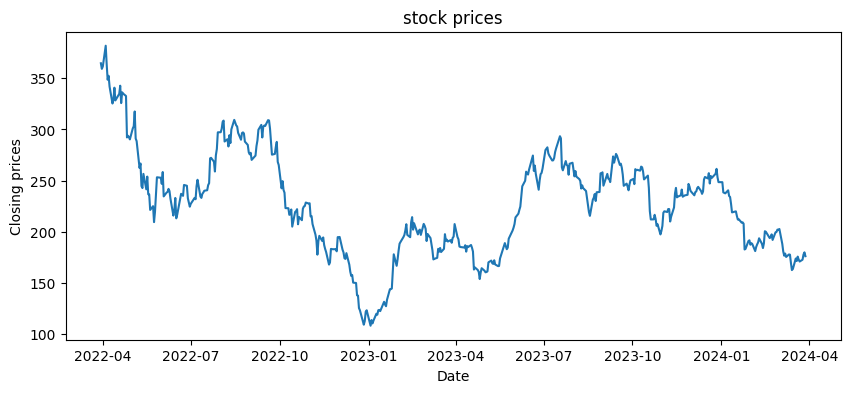

In [5]:
#plotting the stock prices
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.ylabel("Closing prices")
plt.xlabel("Date")
plt.title("stock prices")

Text(0.5, 1.0, 'Returns of TSLA')

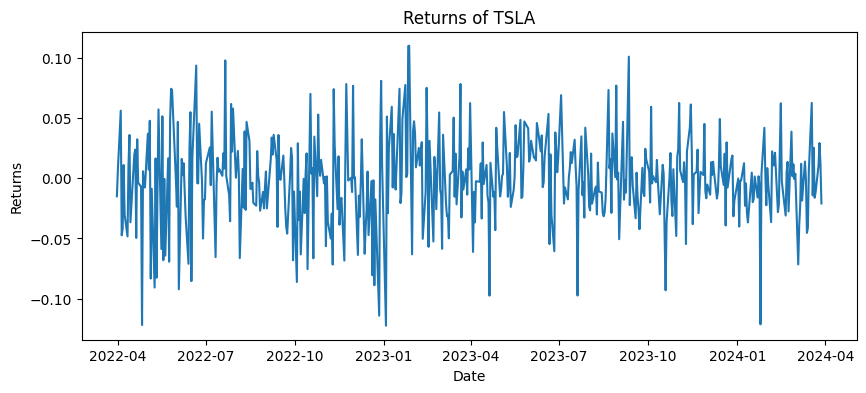

In [6]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel("Returns")
plt.xlabel("Date")
plt.title("Returns of TSLA")

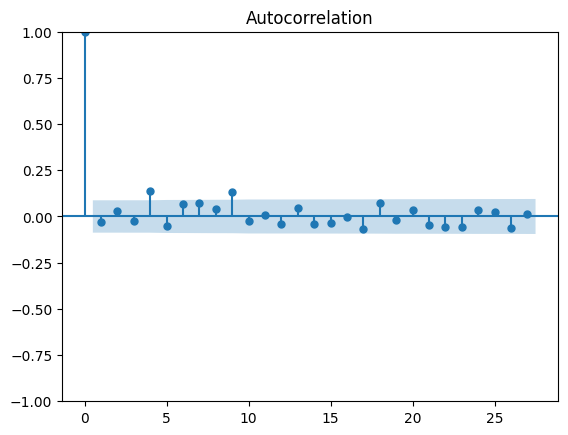

In [7]:
#plotting acf and pacf
#acf is use for moving average and pacf is use for ar(autoregressive)

plot_acf(returns)
plt.show()


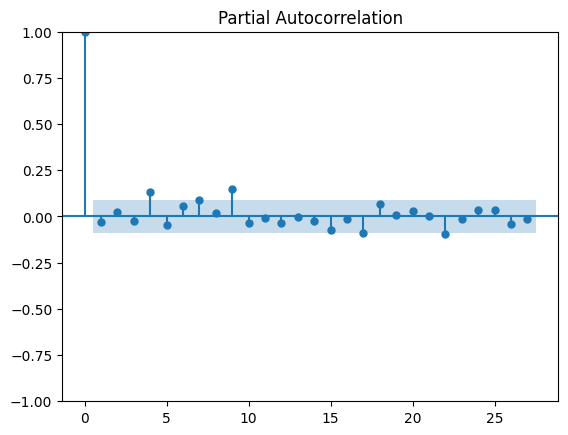

In [8]:
plot_pacf(returns, method='ywm')
plt.show()

In [9]:
#building the model of ARIMA (2 years data)

model = ARIMA(prices,order=(4,1,4))
fitted = model.fit()
print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  502
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1754.534
Date:                Fri, 29 Mar 2024   AIC                           3527.068
Time:                        00:57:07   BIC                           3565.018
Sample:                             0   HQIC                          3541.959
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0421      0.203      0.207      0.836      -0.356       0.440
ar.L2          1.0013      0.162      6.187      0.000       0.684       1.318
ar.L3          0.1456      0.174      0.834      0.4

In [10]:
#predicting the next day price
next_day_price = fitted.forecast (100,alpha=0.05) #(we can predict upto 100 days with alpha = 0.05 95% confidence level of tommorow predicted prices)
print(next_day_price)

502    176.965346
503    176.598587
504    178.231631
505    177.413498
506    178.462214
          ...    
597    177.693903
598    177.693901
599    177.693907
600    177.693899
601    177.693906
Name: predicted_mean, Length: 100, dtype: float64


In [11]:
predicted_price = next_day_price.values[0]
print(f"The predicted price for {tomorrow} tomorrow:", predicted_price)

The predicted price for 2024-03-30 tomorrow: 176.96534577273488


In [12]:
# Importing mean_absolute_error from sklearn.metrics
from sklearn.metrics import mean_absolute_error

# Define the actual prices for the next day
actual_price_next_day = prices.iloc[-1]

# Calculate MAE
mae = mean_absolute_error([actual_price_next_day], [predicted_price])
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.905348214141128


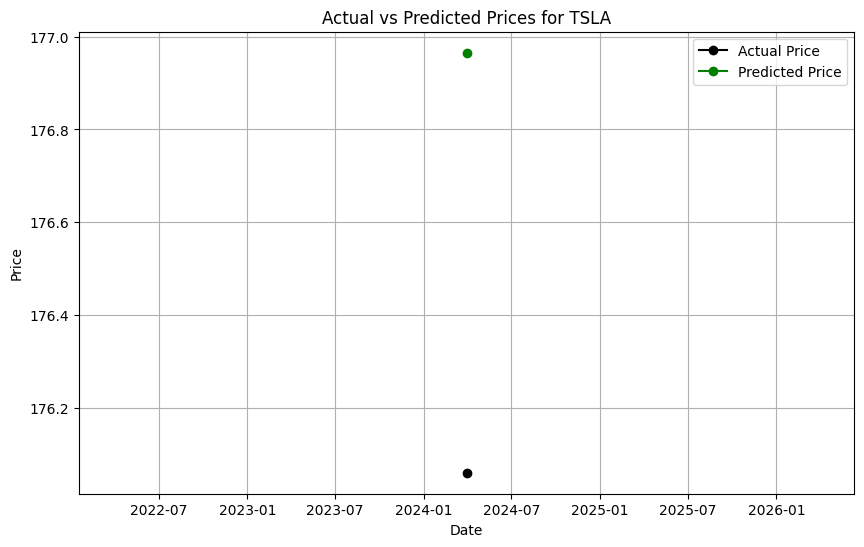

In [13]:
# Plotting actual prices vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot([tomorrow], [actual_price_next_day], marker='o', color='black', label='Actual Price')
plt.plot([tomorrow], [predicted_price], marker='o', color='green', label='Predicted Price')
plt.title("Actual vs Predicted Prices for TSLA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
